# Video 1: Preparing X and y

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
superconductivty_data = fetch_ucirepo(id=464)

# data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets

df = X.join(y)

# We already made sure our data was free of null values and entirely composed of numerical values
# make sure anyway:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [3]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


# Video 2: Review Linear Regression

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme() # I tried set() and it said it was deprecated in favor of set_theme()

# getting largest correlations:

column_corr_df = pd.DataFrame({
    "superconductivty_data_column_name": [],
    "correlation_with_critical_temp": []
    })

for i in df.columns.tolist():
    if i != 'critical_temp':
        corr = df[i].corr(df['critical_temp'])
        corr_new_row = pd.DataFrame({
            'superconductivty_data_column_name': [i],
            'correlation_with_critical_temp': [corr]
        })
        column_corr_df = pd.concat([column_corr_df, corr_new_row], ignore_index=True)

#column_corr_df['correlation_with_critical_temp'].max() #-> returned 0.72
#column_corr_df['correlation_with_critical_temp'].min() -> returned -0.63

column_corr_df_biggest_values = column_corr_df.loc[abs(column_corr_df['correlation_with_critical_temp']) >=0.6]
column_corr_df_biggest_values.head(11)

,superconductivty_data_column_name,correlation_with_critical_temp
0,number_of_elements,0.601069
6,wtd_entropy_atomic_mass,0.626930
17,range_fie,0.600790
26,wtd_entropy_atomic_radius,0.603494
27,range_atomic_radius,0.653759
67,range_ThermalConductivity,0.687654
69,std_ThermalConductivity,0.653632
70,wtd_std_ThermalConductivity,0.721271
71,mean_Valence,-0.600085
72,wtd_mean_Valence,-0.632401


<Axes: xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

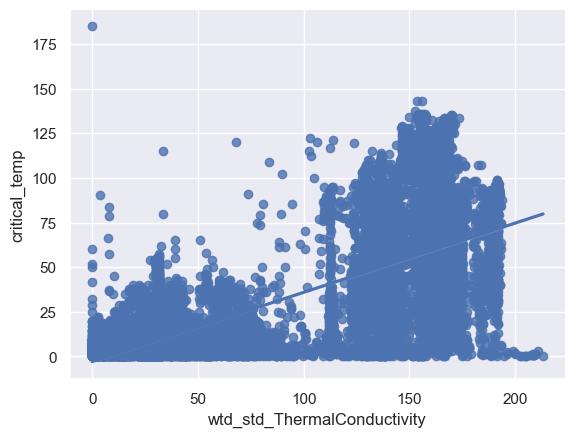

In [5]:
sns.regplot(
    data = df,
    x = df['wtd_std_ThermalConductivity'],
    y = df['critical_temp']
)

# Video 3: Machine Learning - Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

#initialize model
model = LinearRegression()
#fit model to data
model.fit(X, y)
#score model
model.score(X, y)

0.7372672563830798

# Video 4, 5: Adjust and Analyze Model

In [7]:
#initialize model
model = LinearRegression(fit_intercept=False)
#fit model to data
model.fit(X, y)
#score model
model.score(X, y)

0.7370516543409344

In [8]:
X.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [9]:
X['wtd_std_ThermalConductivity/wtd_entropy_atomic_mass'] = X['wtd_std_ThermalConductivity']/X['wtd_entropy_atomic_mass']
#this gave me NaN values, I assume because wtd_entropy_atomic_mass contained zeroes
X['wtd_std_ThermalConductivity/wtd_entropy_atomic_mass'] = X['wtd_std_ThermalConductivity/wtd_entropy_atomic_mass'].fillna(X['wtd_std_ThermalConductivity/wtd_entropy_atomic_mass'].median())

#initialize model
model = LinearRegression(fit_intercept=True, n_jobs=-1)
#fit model to data
model.fit(X, y)
#score model
model.score(X, y)

0.7379248382687789

In [10]:
model.coef_

array([[-3.01263359e+00,  8.35367032e-01, -8.40276404e-01,
        -5.20333841e-01,  6.08299632e-01, -3.53844822e+01,
         3.84638936e+00,  2.07649205e-01,  1.94465474e-02,
        -5.36129090e-01,  6.88318328e-02,  1.09561737e-01,
        -1.28542464e-01, -9.88244050e-02,  1.46961376e-01,
        -1.03266842e+02,  3.91183851e+01,  6.61465049e-02,
         2.08774084e-02, -1.80127625e-01, -3.44759581e-02,
        -4.94907980e-01,  3.16352099e+00,  1.51650285e-01,
        -2.75853327e+00,  7.55652746e+01,  4.58709040e+01,
         1.95079719e-01, -8.84005668e-02, -3.46540932e-01,
        -3.27442465e-01, -4.97849274e-03,  2.79867330e-04,
         1.42475660e-03,  1.82973952e-03,  1.63248541e+01,
        -1.88744960e+01, -1.59517855e-03, -1.35310226e-05,
         6.45458329e-03, -1.98613050e-03, -1.14447750e-01,
         5.16737018e-01,  1.78851913e-01, -5.68556895e-01,
         5.00533130e+00, -2.14775442e+01, -3.66017979e-01,
        -1.44914526e-01,  1.23634540e+00, -5.29979572e-0

In [11]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [12]:
model.intercept_

array([-21.74445553])

# Video 6: Model Predictions

In [13]:
model.predict(X.tail())

array([[ 6.68605949],
       [99.21844417],
       [-4.83214525],
       [-3.42178429],
       [ 6.75904209]])

In [14]:
y.tail()

,critical_temp
21258,2.44
21259,122.10
21260,1.98
21261,1.84
21262,12.80


In [15]:
new_row = X.tail(1)
new_row.iloc[[0],[1]] = 90

#new_row.head()

model.predict(new_row)

array([[8.87391296]])

In [16]:
#using iloc and concat because there are too many rows to do it manually

new_row_2 = X.iloc[[21261]]
new_row_2.iloc[[0],[7]] = 0.68
#new_row_2.head()

new_rows = pd.concat([new_row_2, new_row])

model.predict(new_rows)

array([[-6.08667528],
       [ 8.87391296]])

In [45]:
predicted_y = pd.DataFrame(model.predict(X))

predicted_vs_actual_y = y.join(predicted_y)

predicted_vs_actual_y.tail()

,critical_temp,0
21258,2.44,6.686059
21259,122.10,99.218444
21260,1.98,-4.832145
21261,1.84,-3.421784
21262,12.80,8.873913


<Axes: xlabel='critical_temp', ylabel='0'>

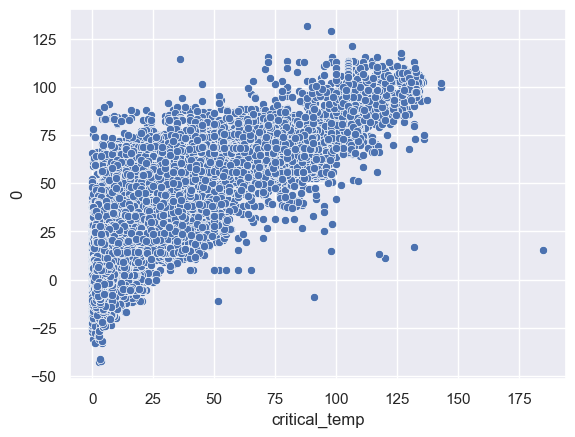

In [51]:
sns.scatterplot(
    data = predicted_vs_actual_y,
    x = predicted_vs_actual_y['critical_temp'],
    y = predicted_vs_actual_y[0]
)

# Good Model or not?

Overall, it seems like linear regression is not a great model for this dataset. Based on the comparisons I have tested between the predictions of the model and the actual data, it does not make the best predictions. Although its score of 0.737 is decent, it is not good enough that it would be useful for any practical application.